In [1]:
%matplotlib inline
import matlab.engine
import matlab
#eng = matlab.engine.start_matlab()  
eng = matlab.engine.connect_matlab()

In [2]:
import matplotlib.pyplot as plt
import do_plot_get2 as dpg
import numpy as np

import os,sys,datetime
import traceback

reload(dpg)

Ns=256
froot0= './data/'
testlabel = 'ns_randn4_test_N' + str(Ns)

ktest0=0
Stest=100

froot1 = './synthesis/'
modellabel = 'tur2a_modelC_synthesis'
folds=9
S = 10

J=5
L=8
Delta=2
kmin=0
kmax=4
jmin=1

cache=1
mode=3

In [3]:
from random import randint
fol_test_cov1 = []
fol_model_cov1 = []

# fol is for each model
try:
    # only 1 fold for test
    cov1re_test,cov1im_test = dpg.evalcovfoveal_test(eng,froot0,testlabel,ktest0,Stest,J,L,Delta,kmin,kmax,jmin,ext='matlab',cache=cache,mode=mode)
    cov1_test = cov1re_test + 1j * cov1im_test
    fol_test_cov1.append(cov1_test)
    for fol in range(folds):
        kstart=fol+1
        modelmat = modellabel + '_ks' + str(kstart-1)
        cov1re_model,cov1im_model = dpg.evalcovfoveal_test(eng,froot1,modelmat,0,S,J,L,Delta,kmin,kmax,jmin,ext='matlab',cache=cache,mode=mode,permute=0)
        cov1_model = cov1re_model + 1j * cov1im_model 
        fol_model_cov1.append(cov1_model)
        
    eng.quit()
except:
    var = traceback.format_exc()
    print "Unexpected error:", sys.exc_info()[0]
    eng.quit()
    print var
print('done')

('load', './cache/stats/88/ns_randn4_test_N256_k0_100_evalcovfoveal3_test_582041.mat')
last modified: Wed Nov 13 14:59:02 2019
('getori matlab fname=', 'tur2a_modelC_synthesis_ks0')
load cached data: ./synthesis/tur2a_modelC_synthesis_ks0
('test set size', 10)
('run matlab to eval bumpcovfoveal3 with klim ... use nbcores=', 12)
('getori matlab fname=', 'tur2a_modelC_synthesis_ks1')
load cached data: ./synthesis/tur2a_modelC_synthesis_ks1
('test set size', 10)
('run matlab to eval bumpcovfoveal3 with klim ... use nbcores=', 12)
('getori matlab fname=', 'tur2a_modelC_synthesis_ks2')
load cached data: ./synthesis/tur2a_modelC_synthesis_ks2
('test set size', 10)
('run matlab to eval bumpcovfoveal3 with klim ... use nbcores=', 12)
('getori matlab fname=', 'tur2a_modelC_synthesis_ks3')
load cached data: ./synthesis/tur2a_modelC_synthesis_ks3
('test set size', 10)
('run matlab to eval bumpcovfoveal3 with klim ... use nbcores=', 12)
('getori matlab fname=', 'tur2a_modelC_synthesis_ks4')
load c

(8025, 8025)
('invdiaghalf shape', (8025, 8025))
(8025, 8025)
('invdiaghalf shape', (8025, 8025))
(8025, 8025)
('invdiaghalf shape', (8025, 8025))
(8025, 8025)
('invdiaghalf shape', (8025, 8025))
(8025, 8025)
('invdiaghalf shape', (8025, 8025))
(8025, 8025)
('invdiaghalf shape', (8025, 8025))
(8025, 8025)
('invdiaghalf shape', (8025, 8025))
(8025, 8025)
('invdiaghalf shape', (8025, 8025))
(8025, 8025)
('invdiaghalf shape', (8025, 8025))
(8025, 8025)
('invdiaghalf shape', (8025, 8025))


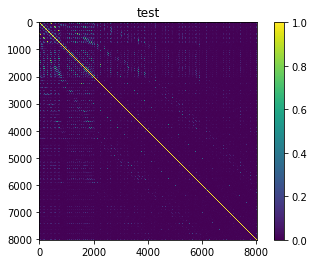

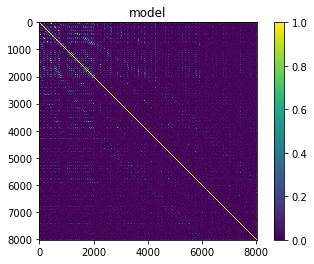

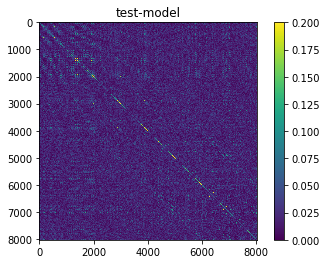

In [4]:
reload(dpg)
fol_test_corr1,fol_model_corr1 = dpg.evaluate_corr(fol_test_cov1,fol_model_cov1,toplot=0)

In [5]:
reload(dpg)
dpg.compute_Kcorr_model(fol_test_corr1,fol_model_corr1)

epsilon^model:mean/std = 2.4e-01(+/-2.2e-02)


[0.26342985877547037,
 0.24696162246326983,
 0.22733349050614254,
 0.26884797985165987,
 0.24523443855124522,
 0.22728088846052524,
 0.21073636552125743,
 0.21217373999114686,
 0.2697921552546639]